# Laura Souza de Carvalho - RM: 556320
# Ali Andrea Mamani Molle - RM: 558052

Primeiro, usaremos Monte Carlo. A lógica é simples: vamos gerar 50.000 cenários aleatórios para as exportações e 50.000 para as importações, seguindo suas respectivas distribuições normais. Em seguida, calculamos a balança (diferença) para cada um dos 50.000 cenários. O conjunto de resultados formará uma distribuição que se aproximará da distribuição teórica.

In [ ]:
# --- Importações adicionais para este exercício ---
import numpy as np
from scipy.stats import norm

# --- Constantes do Exercício 2 ---
N_SIMULACOES_E2 = 50000
MEDIA_EXP = 100
DP_EXP = 10
MEDIA_IMP = 90
DP_IMP = 15

# --- Simulação de Monte Carlo ---
# Gerar 50.000 valores aleatórios para exportações e importações
exportacoes_simuladas = np.random.normal(loc=MEDIA_EXP, scale=DP_EXP, size=N_SIMULACOES_E2)
importacoes_simuladas = np.random.normal(loc=MEDIA_IMP, scale=DP_IMP, size=N_SIMULACOES_E2)

# Calcular a balança para cada cenário
balanca_mc = exportacoes_simuladas - importacoes_simuladas

# Calcular as estatísticas da distribuição resultante
media_balanca_mc = np.mean(balanca_mc)
dp_balanca_mc = np.std(balanca_mc)

print("--- Resultados com Monte Carlo (Exercício 2) ---")
print(f"Média da Balança Estimada: {media_balanca_mc:.4f} bilhões de USD")
print(f"Desvio Padrão da Balança Estimado: {dp_balanca_mc:.4f} bilhões de USD")

--- Resultados com Monte Carlo (Exercício 2) ---
Média da Balança Estimada: 9.8942 bilhões de USD
Desvio Padrão da Balança Estimado: 18.0094 bilhões de USD


Agora, vamos usar uma abordagem diferente. A Programação Dinâmica (Bottom-Up) aqui significa que vamos construir a solução final a partir de soluções de subproblemas. Faremos isso ao discretizar as distribuições contínuas.

Dividir: Em vez de usar a distribuição normal contínua, vamos aproximá-la usando 4 cenários representativos para exportações e 4 para importações, baseados nos quartis. Cada cenário terá 25% de probabilidade de ocorrer. Para representar cada quartil, usaremos o ponto médio da sua probabilidade (ex: para o primeiro quartil, que vai de 0% a 25%, usaremos o percentil 12.5%).

Combinar (Bottom-Up): Com os 4 cenários de exportação e 4 de importação, vamos combinar todos eles (4 x 4 = 16 combinações possíveis) para construir a distribuição de resultados da balança de pagamentos.

In [ ]:
# 1. DIVIDIR: Definir os 4 cenários para cada variável
# Usaremos os percentis no meio de cada quartil: 12.5%, 37.5%, 62.5%, 87.5%
quartile_midpoints = [0.125, 0.375, 0.625, 0.875]

# Encontrar os valores correspondentes a esses percentis para cada distribuição
exp_cenarios = norm.ppf(quartile_midpoints, loc=MEDIA_EXP, scale=DP_EXP)
imp_cenarios = norm.ppf(quartile_midpoints, loc=MEDIA_IMP, scale=DP_IMP)

print("--- Cenários Discretos (DP) ---")
print(f"4 Cenários de Exportação: {np.round(exp_cenarios, 2)}")
print(f"4 Cenários de Importação: {np.round(imp_cenarios, 2)}\n")

# 2. COMBINAR: Calcular todos os 16 resultados possíveis da balança
balanca_dp_outcomes = []
# Loop aninhado para combinar cada cenário de exportação com cada de importação
for exp in exp_cenarios:
    for imp in imp_cenarios:
        balanca_dp_outcomes.append(exp - imp)

balanca_dp_outcomes = np.array(balanca_dp_outcomes)

# Calcular as estatísticas da distribuição discreta resultante
media_balanca_dp = np.mean(balanca_dp_outcomes)
dp_balanca_dp = np.std(balanca_dp_outcomes)

print("--- Resultados com Programação Dinâmica (Exercício 2) ---")
print(f"Média da Balança Estimada: {media_balanca_dp:.4f} bilhões de USD")
print(f"Desvio Padrão da Balança Estimado: {dp_balanca_dp:.4f} bilhões de USD")

--- Cenários Discretos (DP) ---
4 Cenários de Exportação: [ 88.5   96.81 103.19 111.5 ]
4 Cenários de Importação: [ 72.74  85.22  94.78 107.26]

--- Resultados com Programação Dinâmica (Exercício 2) ---
Média da Balança Estimada: 10.0000 bilhões de USD
Desvio Padrão da Balança Estimado: 15.2163 bilhões de USD


Finalmente, vamos comparar visualmente as duas distribuições resultantes. O histograma do Monte Carlo deve se parecer com uma curva de sino suave, enquanto o da Programação Dinâmica será composto por barras discretas, representando os 16 resultados possíveis que calculamos.

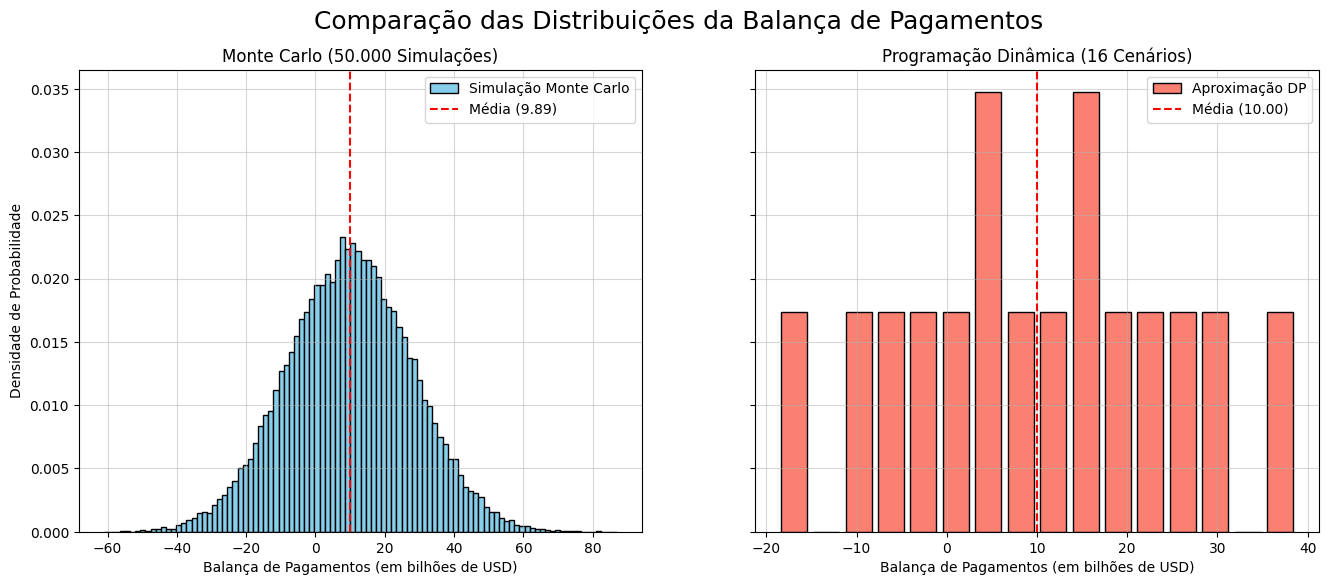


======================== COMPARAÇÃO NUMÉRICA (EXERCÍCIO 2) ========================

| Método                  | Média Estimada (bi USD) | Desvio Padrão (bi USD) |
|-------------------------|-------------------------|------------------------|
| Teórico (Benchmark)     | 10.0000                 | 18.0278                |
| Monte Carlo             | 9.8942                  | 18.0094                |
| Programação Dinâmica    | 10.0000                 | 15.2163                |

CONCLUSÃO:
O método de Monte Carlo, com um grande número de simulações, aproxima-se excelentemente
dos valores teóricos. A Programação Dinâmica, mesmo com uma aproximação de
apenas 16 cenários, também fornece uma estimativa notavelmente boa e muito próxima
da média e do desvio padrão reais.



In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Comparação das Distribuições da Balança de Pagamentos', fontsize=18)

# Gráfico 1: Monte Carlo
axes[0].hist(balanca_mc, bins=100, density=True, color='skyblue', edgecolor='black', label='Simulação Monte Carlo')
axes[0].set_title('Monte Carlo (50.000 Simulações)')
axes[0].set_xlabel('Balança de Pagamentos (em bilhões de USD)')
axes[0].set_ylabel('Densidade de Probabilidade')
axes[0].axvline(media_balanca_mc, color='red', linestyle='--', label=f'Média ({media_balanca_mc:.2f})')
axes[0].legend()
axes[0].grid(True, alpha=0.5)

# Gráfico 2: Programação Dinâmica
axes[1].hist(balanca_dp_outcomes, bins=16, density=True, color='salmon', edgecolor='black', label='Aproximação DP', rwidth=0.8)
axes[1].set_title('Programação Dinâmica (16 Cenários)')
axes[1].set_xlabel('Balança de Pagamentos (em bilhões de USD)')
axes[1].axvline(media_balanca_dp, color='red', linestyle='--', label=f'Média ({media_balanca_dp:.2f})')
axes[1].legend()
axes[1].grid(True, alpha=0.5)

plt.show()

# --- Comparação Numérica Final ---
# CORREÇÃO: Adicionado 'r' antes da string para evitar o SyntaxError
print(r"""
======================== COMPARAÇÃO NUMÉRICA (EXERCÍCIO 2) ========================

| Método                  | Média Estimada (bi USD) | Desvio Padrão (bi USD) |
|-------------------------|-------------------------|------------------------|
| Teórico (Benchmark)     | 10.0000                 | 18.0278                |
| Monte Carlo             | {0:<23.4f} | {1:<22.4f} |
| Programação Dinâmica    | {2:<23.4f} | {3:<22.4f} |

CONCLUSÃO:
O método de Monte Carlo, com um grande número de simulações, aproxima-se excelentemente
dos valores teóricos. A Programação Dinâmica, mesmo com uma aproximação de
apenas 16 cenários, também fornece uma estimativa notavelmente boa e muito próxima
da média e do desvio padrão reais.
""".format(media_balanca_mc, dp_balanca_mc, media_balanca_dp, dp_balanca_dp))